<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/Tugas_KSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

#warning handle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#mount data from googledrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#add data set from its path
tr_path = "/content/drive/MyDrive/train_proj.csv"
te_path = "/content/drive/MyDrive/test_proj.csv"
tr_df = pd.read_csv(tr_path, index_col = 'id')
te_df = pd.read_csv(te_path, index_col = 'id')
tr_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
te_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,NaN
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,NaN
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,NaN
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,NaN
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,NaN


In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [6]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 381110 to 508146
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
 10  Response              0 non-null       float64
dtypes: float64(4), int64(4), object(3)
memory usage: 11.6+ MB


In [7]:
print("Training Shape (row, col): {}, Testing Shape (row, col): {}".format(tr_df.shape, te_df.shape))

Training Shape (row, col): (381109, 11), Testing Shape (row, col): (127037, 11)


In [8]:
tr_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
te_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,0.0
mean,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301,NaN
std,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588,NaN
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,NaN
25%,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000,NaN
50%,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000,NaN
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,NaN
max,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000,NaN


In [10]:
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()
for col in cat[:6]:
    print("train\n")
    print(col,"\n",tr_df[col].value_counts()/tr_df.shape[0],"\n\n")
    print("test\n")
    print(col,"\n",te_df[col].value_counts()/te_df.shape[0],"\n\n")

train

Gender 
 Male      0.540761
Female    0.459239
Name: Gender, dtype: float64 


test

Gender 
 Male      0.537135
Female    0.462865
Name: Gender, dtype: float64 


train

Vehicle_Age 
 1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64 


test

Vehicle_Age 
 1-2 Year     0.525036
< 1 Year     0.433094
> 2 Years    0.041870
Name: Vehicle_Age, dtype: float64 


train

Vehicle_Damage 
 Yes    0.504877
No     0.495123
Name: Vehicle_Damage, dtype: float64 


test

Vehicle_Damage 
 Yes    0.502491
No     0.497509
Name: Vehicle_Damage, dtype: float64 




In [11]:
for call in cat[6:8]:
    tr_df[call] = pd.to_datetime(tr_df[call])
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


0    334399
1     46710
Name: Response, dtype: int64


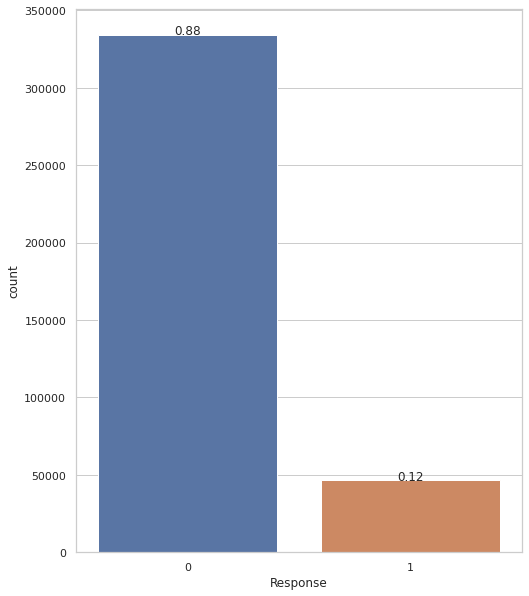

In [12]:
#data visualization
print(tr_df["Response"].value_counts())
#tr_df[cat[-1]].hist(grid = False)

#print(i)
total = float(len(tr_df["Response"]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(tr_df["Response"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

In [13]:
num_cols =  tr_df.select_dtypes('number').columns.to_list()
cat_cols =  tr_df.select_dtypes('object').columns.to_list() 

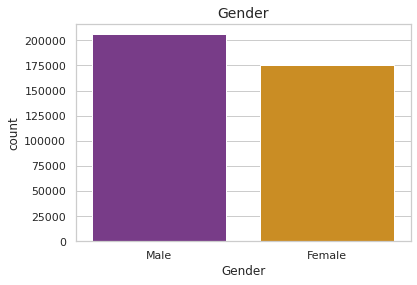

% of total:
Male      54.08
Female    45.92
Name: Gender, dtype: float64


In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender" , data=tr_df ,palette='CMRmap')
plt.title("Gender", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Gender"].value_counts()/tr_df.shape[0]),4)*100)

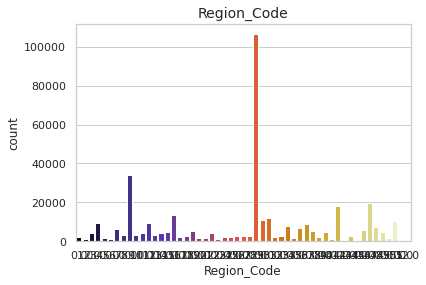

% of total:
28.0    27.92
8.0      8.89
46.0     5.18
41.0     4.79
15.0     3.49
30.0     3.20
29.0     2.90
50.0     2.69
3.0      2.43
11.0     2.42
36.0     2.31
33.0     2.01
47.0     1.95
35.0     1.82
6.0      1.65
45.0     1.47
37.0     1.44
18.0     1.35
48.0     1.23
14.0     1.23
39.0     1.22
10.0     1.15
21.0     1.12
2.0      1.06
13.0     1.06
7.0      0.86
12.0     0.84
9.0      0.81
27.0     0.74
32.0     0.73
43.0     0.69
17.0     0.69
26.0     0.68
25.0     0.66
24.0     0.63
38.0     0.53
0.0      0.53
16.0     0.53
31.0     0.51
23.0     0.51
20.0     0.51
49.0     0.48
4.0      0.47
34.0     0.44
19.0     0.40
22.0     0.34
40.0     0.34
5.0      0.34
1.0      0.26
44.0     0.21
42.0     0.16
52.0     0.07
51.0     0.05
Name: Region_Code, dtype: float64


In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Region_Code" , data=tr_df ,palette='CMRmap')
plt.title("Region_Code", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Region_Code"].value_counts()/tr_df.shape[0]),4)*100)

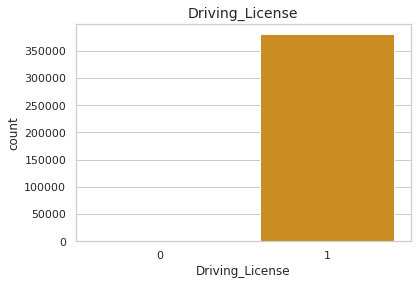

% of total:
1    99.79
0     0.21
Name: Driving_License, dtype: float64


In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Driving_License" , data=tr_df ,palette='CMRmap')
plt.title("Driving_License", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Driving_License"].value_counts()/tr_df.shape[0]),4)*100)

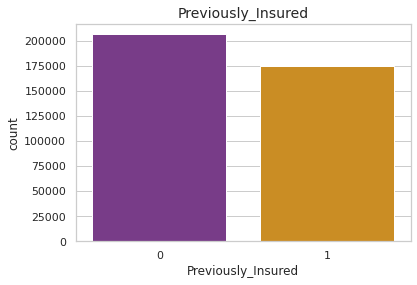

% of total:
0    54.18
1    45.82
Name: Previously_Insured, dtype: float64


In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Previously_Insured" , data=tr_df ,palette='CMRmap')
plt.title("Previously_Insured", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Previously_Insured"].value_counts()/tr_df.shape[0]),4)*100)

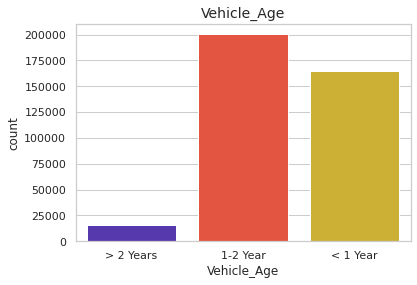

% of total:
1-2 Year     52.56
< 1 Year     43.24
> 2 Years     4.20
Name: Vehicle_Age, dtype: float64


In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Vehicle_Age" , data=tr_df ,palette='CMRmap')
plt.title("Vehicle_Age", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Vehicle_Age"].value_counts()/tr_df.shape[0]),4)*100)

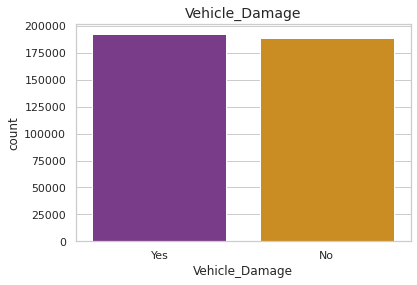

% of total:
Yes    50.49
No     49.51
Name: Vehicle_Damage, dtype: float64


In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="Vehicle_Damage" , data=tr_df ,palette='CMRmap')
plt.title("Vehicle_Damage", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Vehicle_Damage"].value_counts()/tr_df.shape[0]),4)*100)

In [20]:
tr_df["Age"].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [21]:
tr_df["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [22]:
tr_df["Policy_Sales_Channel"].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [23]:
tr_df["Vintage"].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

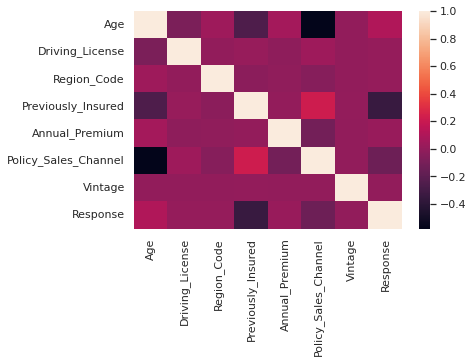

In [24]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='rocket')

In [25]:
#correlation table
corr = tr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.00,-0.08,0.04,-0.25,0.07,-0.58,-0.00,0.11
Driving_License,-0.08,1.00,-0.00,0.01,-0.01,0.04,-0.00,0.01
Region_Code,0.04,-0.00,1.00,-0.02,-0.01,-0.04,-0.00,0.01
Previously_Insured,-0.25,0.01,-0.02,1.00,0.00,0.22,0.00,-0.34
Annual_Premium,0.07,-0.01,-0.01,0.00,1.00,-0.11,-0.00,0.02
Policy_Sales_Channel,-0.58,0.04,-0.04,0.22,-0.11,1.00,0.00,-0.14
Vintage,-0.00,-0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00
Response,0.11,0.01,0.01,-0.34,0.02,-0.14,-0.00,1.00


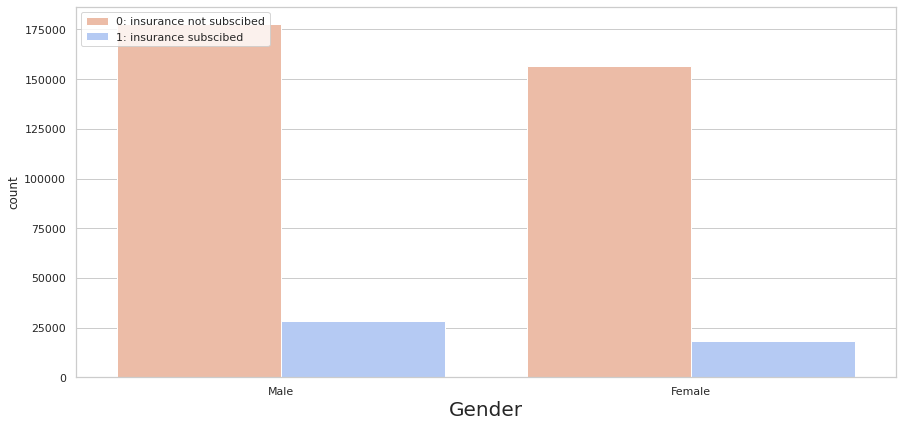

In [26]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Gender" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Gender", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [27]:
pd.pivot_table(tr_df, index=["Gender","Response"], aggfunc = {col:np.count_nonzero})

Vehicle_Damage
Gender Response                
Female 0                 156835
       1                  18185
Male   0                 177564
       1                  28525

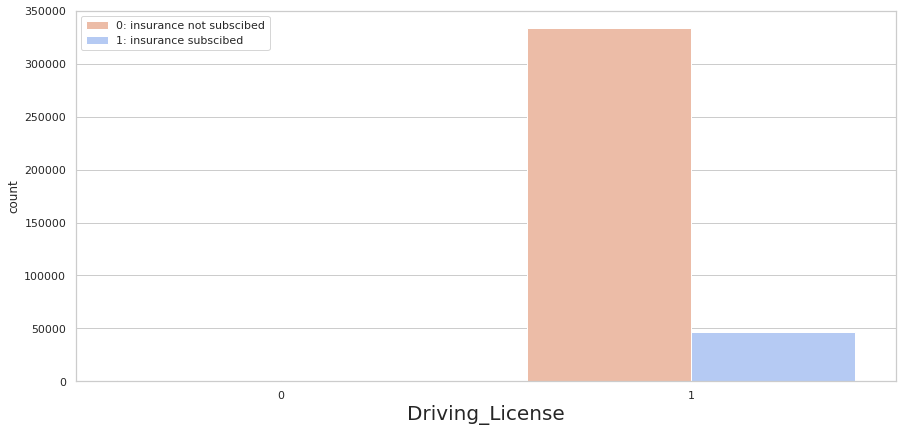

In [28]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Driving_License" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Driving_License", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [29]:
pd.pivot_table(tr_df, index=["Driving_License","Response"], aggfunc = {col:np.count_nonzero})

Vehicle_Damage
Driving_License Response                
0               0                    771
                1                     41
1               0                 333628
                1                  46669

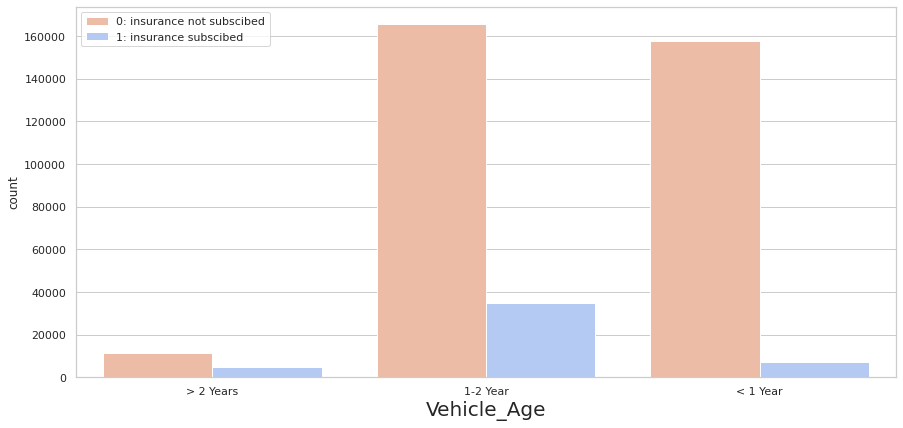

In [42]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Vehicle_Age" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Vehicle_Age", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [43]:
pd.pivot_table(tr_df, index=["Vehicle_Age","Response"], aggfunc = {col:np.count_nonzero})

Vehicle_Damage
Vehicle_Age Response                
1-2 Year    0                 165510
            1                  34806
< 1 Year    0                 157584
            1                   7202
> 2 Years   0                  11305
            1                   4702

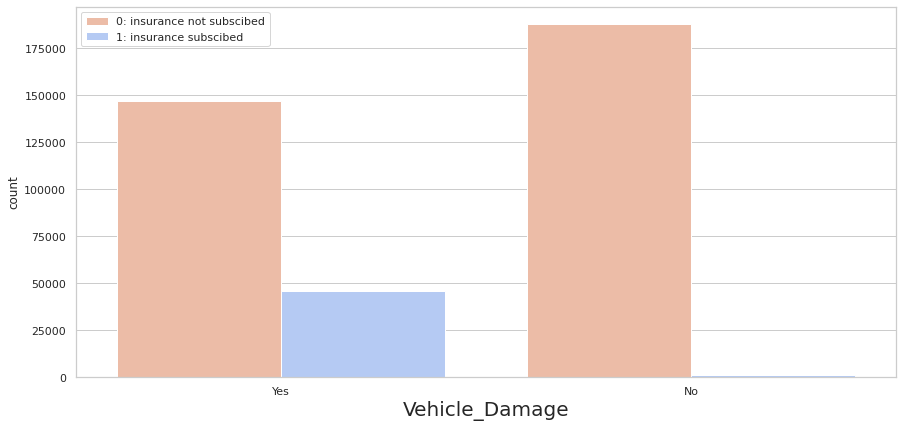

In [40]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Vehicle_Damage" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Vehicle_Damage", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [41]:
pd.pivot_table(tr_df, index=["Vehicle_Damage","Response"], aggfunc = {col:np.count_nonzero})

Vehicle_Damage
Vehicle_Damage Response                
No             0                 187714
               1                    982
Yes            0                 146685
               1                  45728

In [30]:
#one hot encoding
cols = ['Gender', 'Vehicle_Age','Vehicle_Damage']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int64')
#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)

tr_fe = tr_fe.drop(cols, axis = 1)
te_fe = te_fe.drop(cols, axis = 1)

print(tr_fe.info())
print(te_fe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    381109 non-null  int64  
 1   Driving_License        381109 non-null  int64  
 2   Region_Code            381109 non-null  float64
 3   Previously_Insured     381109 non-null  int64  
 4   Annual_Premium         381109 non-null  float64
 5   Policy_Sales_Channel   381109 non-null  float64
 6   Vintage                381109 non-null  int64  
 7   Response               381109 non-null  int64  
 8   Gender_Female          381109 non-null  int64  
 9   Gender_Male            381109 non-null  int64  
 10  Vehicle_Age_1-2 Year   381109 non-null  int64  
 11  Vehicle_Age_< 1 Year   381109 non-null  int64  
 12  Vehicle_Age_> 2 Years  381109 non-null  int64  
 13  Vehicle_Damage_No      381109 non-null  int64  
 14  Vehicle_Damage_Yes     381109 non-nu

In [31]:
y = tr_fe['Response']
X = tr_fe.drop('Response', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [32]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

In [33]:
#model
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_2.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.877437   0.000000  0.000000  0.000000
Valid2  0.876230   0.238636  0.004496  0.008825
Valid3  0.876715   0.329193  0.005673  0.011154
Valid4  0.877437   0.000000  0.000000  0.000000
Valid5  0.876596   0.297468  0.005031  0.009895 


Mean Scores:

	accuracy: 0.8769
	precision: 0.1731
	recall: 0.003
	f1: 0.006


In [34]:
#model
RF = RandomForestClassifier()
#cross validation
RF_report = pd.DataFrame(cross_validate(RF, X, y, scoring=scoring))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the columns
RF_report.columns = scoring
#naming the index
RF_report.index = index

#final result collection
model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.865196   0.353440  0.120424  0.179641
Valid2  0.866679   0.373379  0.129416  0.192210
Valid3  0.865433   0.357875  0.123314  0.183425
Valid4  0.866758   0.366294  0.119353  0.180042
Valid5  0.865523   0.357502  0.121923  0.181833 


Mean Scores:

	accuracy: 0.8659
	precision: 0.3617
	recall: 0.1229
	f1: 0.1834


In [35]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_2),
    'Random Forest': np.array(model_3)})
Models.index = scoring
Models

,Logistic Regression,Random Forest
accuracy,0.8769,0.8659
precision,0.1731,0.3617
recall,0.0030,0.1229
f1,0.0060,0.1834


In [39]:
RF.fit(X,y)
X_test = te_fe.drop("Response", axis = 1)
te_fe["Response"] = RF.predict(X_test)
te_fe["Response"] = te_fe["Response"].apply(lambda x: "will not buy insurance" if x==0 else "will buy insurance")
te_fe["Response"].value_counts()

will not buy insurance    121710
will buy insurance          5327
Name: Response, dtype: int64